# Installation and Repository cloning

In [ ]:
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
#!pip install adversarial-robustness-toolbox -U
#!pip install git+https://github.com/RobustBench/robustbench.git
#!pip install matplotlib
#!pip install pillow
#!pip install foolbox

Looking in indexes: https://download.pytorch.org/whl/cu124
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 29.3 MB/s eta 0:01:26
     ---------------------------------------- 0.0/2.5 GB 28.8 MB/s eta 0:01:27
     ---------------------------------------- 0.0/2.5 GB 29.1 MB/s eta 0:01:26
     ---------------------------------------- 0.0/2.5 GB 28.9 MB/s eta 0:01:26
     ---------------------------------------- 0.0/2.5 GB 28.8 MB/s eta 0:01:27
      --------------------------------------- 0.0/2.5 GB 29.0 MB/s eta 0:01:26
      --------------------------------------- 0.0/2.5 GB 28.9 MB/s eta 0:01:26
      --------------------------------------- 0.0/2.5 GB 29.0 MB/s eta 0:01:26
      --------------------------------------- 0.1/2.5 GB 28.9 MB/s eta 0:01:25
      --------------------------------------- 0.1/2.5 GB 28.9 MB/s eta 0:01:25
     - -------------------------------------- 0.1/2.5 GB 28.9 MB/s eta 0:01:25
 

  Running command git clone --filter=blob:none --quiet https://github.com/RobustBench/robustbench.git 'C:\Users\Admin\AppData\Local\Temp\pip-req-build-yi2awuf6'


  Using cached matplotlib-3.9.3-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.2-cp39-cp39-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached matplotlib-3.9.3-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.2-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
  Using cached foolbox-3.3.4-py3-none-any.whl.metadata (7.3 kB)
  Using cached

## Import Libraries

In [1]:
import torch
import utils
import matplotlib.pyplot as plt
import numpy as np
import json
import adversarial_attack.attack_utils as attack_utils

c:\Users\Admin\Desktop\Python\elastic_net_adversarial_attack\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Admin\Desktop\Python\elastic_net_adversarial_attack\.venv\lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
c:\Users\Admin\Desktop\Python\elastic_net_adversarial_attack\.venv\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
c:\Users\Admin\Desktop\Python\elastic_net_adversarial_attack\.venv\lib\site-

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Load and Prepare Adversarial Model

In [3]:
model = 'Wang2023Better_WRN-28-10' #MainiAVG, MainiMSD, CroceL1, Wang2023Better_WRN-28-10
model_norm = 'Linf'
net, art_net, fb_net = utils.get_model(modelname=model, norm=model_norm)

c:\Users\Admin\Desktop\Python\elastic_net_adversarial_attack\.venv\lib\site-packages\robustbench\utils.py:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = tor

## Parameters

In [4]:
norm = 1  # 1, 2, np.inf
max_iterations_fast_attacks = 20
max_iterations_slow_attacks = 20
eps_iter = 0.15
epsilon = 12

## Load the dataset

In [5]:
splitsize = 20 # full, int: splitsize
xtest, ytest = utils.load_dataset(dataset_split=splitsize)

Files already downloaded and verified


## Test Accuracy

In [6]:
utils.test_accuracy(net, xtest, ytest)


Accuracy of the test set is: 100.000%



# Experiments

In [7]:
attack_types = [#'fast_gradient_method', #bounded-full
                #'projected_gradient_descent', #bounded-full
                #'pgd_early_stopping', #not-bounded
                #'auto_projected_gradient_descent', #bounded-full
                #'deep_fool', #not-bounded
                #'brendel_bethge', #bounded-min
                #'carlini_wagner_l2', #not-bounded
                'elastic_net', #not-bounded
                'exp_attack',
                'exp_attack_smooth',
                'elastic_net_L1_rule', #not-bounded
                'elastic_net_L1_rule_higher_beta', #not-bounded
                #'ART_AutoAttack', #bounded-full
                #'original_AutoAttack', #bounded-full
                ]

results_dict = {}

for attack_type in attack_types:
    results_dict[attack_type] = {}
    print(f'\t\t-------------------------- Processing Attack: {attack_type} --------------------------\n')
    results_dict[attack_type]["adversarial_distance"], results_dict[attack_type]["runtime"], results_dict[attack_type]["adversarial_accuracy"], results_dict[attack_type]["attack_success_rate"], results_dict[attack_type]["attack_success_rate_in_epsilon"] = attack_utils.calculation(
                                                        art_net=art_net,
                                                        fb_net=fb_net,
                                                        net = net,
                                                        xtest=xtest,
                                                        ytest=ytest,
                                                        epsilon=epsilon,
                                                        eps_iter=eps_iter,
                                                        norm=norm,
                                                        max_iterations_fast_attacks=max_iterations_fast_attacks,
                                                        max_iterations_slow_attacks=max_iterations_slow_attacks,
                                                        attack_type=attack_type,
                                                        verbose=True)
    
    mean_value = np.mean([x for x in results_dict[attack_type]["adversarial_distance"] if x is not None])

    print(f'\nMean adversarial distance for {attack_type}: {mean_value:.5f} with total runtime: {sum(results_dict[attack_type]["runtime"]): .5f} seconds\n')

		-------------------------- Processing Attack: elastic_net --------------------------



EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 0		Adversarial_distance: 21.73723		Runtime: 5.844479 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]


Image 1		Adversarial_distance: 10.49580		Runtime: 5.767995 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]


Image 2		Adversarial_distance: 9.62803		Runtime: 5.751282 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]


Image 3		Adversarial_distance: 7.83371		Runtime: 5.758700 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]


Image 4		Adversarial_distance: 2.57647		Runtime: 5.746990 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]


Image 5		Adversarial_distance: 18.38983		Runtime: 5.765213 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


Image 6		Adversarial_distance: 12.36757		Runtime: 5.785576 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]


Image 7		Adversarial_distance: 15.00859		Runtime: 5.757065 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


Image 8		Adversarial_distance: 3.25364		Runtime: 5.779266 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


Image 9		Adversarial_distance: 5.92122		Runtime: 5.777002 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


Image 10		Adversarial_distance: 49.60374		Runtime: 5.778866 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 11		Adversarial_distance: 4.26648		Runtime: 5.831166 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


Image 12		Adversarial_distance: 26.51556		Runtime: 5.794968 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 13		Adversarial_distance: 0.43459		Runtime: 5.810073 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.86s/it]


Image 14		Adversarial_distance: 1.27448		Runtime: 5.871475 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.86s/it]


Image 15		Adversarial_distance: 15.03925		Runtime: 5.879039 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 16		Adversarial_distance: 9.48609		Runtime: 5.807965 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]


Image 17		Adversarial_distance: 37.20800		Runtime: 5.844432 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


Image 18		Adversarial_distance: 10.53010		Runtime: 5.809672 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 19		Adversarial_distance: 45.21165		Runtime: 5.822891 seconds
20 images done. Current Adversarial Accuracy: 0.45%

Adversarial accuracy: 45.0%


Mean adversarial distance for elastic_net: 15.33910 with total runtime:  115.98411 seconds

		-------------------------- Processing Attack: exp_attack --------------------------



ExpAttack:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Admin\Desktop\Python\elastic_net_adversarial_attack\adversarial_attack\exp_attack.py:255: RuntimeWarning: invalid value encountered in log
  v_val = np.where(abc>=15.0,np.log(abc)-np.log(np.log(abc))+np.log(np.log(abc))/np.log(abc), lambertw( np.exp(abc), k=0).real)/b-a
ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.04s/it]


Image 0		Adversarial_distance: 23.95407		Runtime: 6.050693 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


Image 1		Adversarial_distance: 11.47128		Runtime: 6.059689 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


Image 2		Adversarial_distance: 13.45650		Runtime: 6.048324 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]


Image 3		Adversarial_distance: 6.64493		Runtime: 6.074039 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 4		Adversarial_distance: 1.51123		Runtime: 6.075684 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


Image 5		Adversarial_distance: 19.01787		Runtime: 6.063519 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.04s/it]


Image 6		Adversarial_distance: 16.36130		Runtime: 6.059039 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 7		Adversarial_distance: 16.67906		Runtime: 6.077828 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 8		Adversarial_distance: 3.42229		Runtime: 6.064692 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 9		Adversarial_distance: 5.45729		Runtime: 6.074562 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 10		Adversarial_distance: 56.06430		Runtime: 6.063759 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]


Image 11		Adversarial_distance: 5.32012		Runtime: 6.094309 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]


Image 12		Adversarial_distance: 25.47079		Runtime: 6.075654 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]


Image 13		Adversarial_distance: 0.54864		Runtime: 6.087972 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 14		Adversarial_distance: 1.60408		Runtime: 6.080468 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 15		Adversarial_distance: 15.34245		Runtime: 6.065397 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]


Image 16		Adversarial_distance: 7.50721		Runtime: 6.089609 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.10s/it]


Image 17		Adversarial_distance: 28.94399		Runtime: 6.108630 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.09s/it]


Image 18		Adversarial_distance: 9.07069		Runtime: 6.088232 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 19		Adversarial_distance: 37.28706		Runtime: 6.075285 seconds
20 images done. Current Adversarial Accuracy: 0.5%

Adversarial accuracy: 50.0%


Mean adversarial distance for exp_attack: 15.25676 with total runtime:  121.47739 seconds

		-------------------------- Processing Attack: exp_attack_smooth --------------------------



ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


Image 0		Adversarial_distance: 23.01085		Runtime: 6.078691 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 1		Adversarial_distance: 12.72850		Runtime: 6.080270 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


Image 2		Adversarial_distance: 11.53221		Runtime: 6.062566 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.04s/it]


Image 3		Adversarial_distance: 6.08753		Runtime: 6.060502 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 4		Adversarial_distance: 1.53039		Runtime: 6.079854 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]


Image 5		Adversarial_distance: 8.94621		Runtime: 6.096919 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 6		Adversarial_distance: 22.45902		Runtime: 6.083308 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 7		Adversarial_distance: 16.49840		Runtime: 6.062199 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]


Image 8		Adversarial_distance: 2.30485		Runtime: 6.077552 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.04s/it]


Image 9		Adversarial_distance: 5.75211		Runtime: 6.040807 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


Image 10		Adversarial_distance: 62.39650		Runtime: 6.056897 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.04s/it]


Image 11		Adversarial_distance: 4.29017		Runtime: 6.067035 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


Image 12		Adversarial_distance: 33.67461		Runtime: 6.052813 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.03s/it]


Image 13		Adversarial_distance: 0.53316		Runtime: 6.048148 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.04s/it]


Image 14		Adversarial_distance: 1.12375		Runtime: 6.044481 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 15		Adversarial_distance: 18.59262		Runtime: 6.060922 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.03s/it]


Image 16		Adversarial_distance: 6.92995		Runtime: 6.042803 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 17		Adversarial_distance: 35.16430		Runtime: 6.059923 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.02s/it]


Image 18		Adversarial_distance: 5.33970		Runtime: 6.024738 seconds


ExpAttack: 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]


Image 19		Adversarial_distance: 36.95448		Runtime: 6.058465 seconds
20 images done. Current Adversarial Accuracy: 0.45%

Adversarial accuracy: 45.0%


Mean adversarial distance for exp_attack_smooth: 15.79246 with total runtime:  121.23889 seconds

		-------------------------- Processing Attack: elastic_net_L1_rule --------------------------



EAD: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


Image 0		Adversarial_distance: 21.64413		Runtime: 5.793976 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 1		Adversarial_distance: 9.51955		Runtime: 5.808284 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 2		Adversarial_distance: 9.52040		Runtime: 5.812583 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]


Image 3		Adversarial_distance: 5.44262		Runtime: 5.867161 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 4		Adversarial_distance: 1.22440		Runtime: 5.808161 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 5		Adversarial_distance: 18.16242		Runtime: 5.824126 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 6		Adversarial_distance: 12.36748		Runtime: 5.814714 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 7		Adversarial_distance: 15.00848		Runtime: 5.804810 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


Image 8		Adversarial_distance: 2.03032		Runtime: 5.796107 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]


Image 9		Adversarial_distance: 5.85275		Runtime: 5.825244 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


Image 10		Adversarial_distance: 49.60495		Runtime: 5.795548 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 11		Adversarial_distance: 3.29944		Runtime: 5.825519 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 12		Adversarial_distance: 25.79074		Runtime: 5.806627 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 13		Adversarial_distance: 0.32462		Runtime: 5.810193 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 14		Adversarial_distance: 0.86810		Runtime: 5.808840 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


Image 15		Adversarial_distance: 15.03359		Runtime: 5.812470 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


Image 16		Adversarial_distance: 6.55294		Runtime: 5.811888 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 17		Adversarial_distance: 37.19983		Runtime: 5.791123 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 18		Adversarial_distance: 7.23238		Runtime: 5.810242 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 19		Adversarial_distance: 42.08958		Runtime: 5.815020 seconds
20 images done. Current Adversarial Accuracy: 0.45%

Adversarial accuracy: 45.0%


Mean adversarial distance for elastic_net_L1_rule: 14.43844 with total runtime:  116.24264 seconds

		-------------------------- Processing Attack: elastic_net_L1_rule_higher_beta --------------------------



EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 0		Adversarial_distance: 13.40495		Runtime: 5.791052 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]


Image 1		Adversarial_distance: 9.62117		Runtime: 5.823887 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.77s/it]


Image 2		Adversarial_distance: 6.08964		Runtime: 5.790812 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]


Image 3		Adversarial_distance: 3.88680		Runtime: 5.817016 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


Image 4		Adversarial_distance: 1.13749		Runtime: 5.813024 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


Image 5		Adversarial_distance: 9.86580		Runtime: 5.805969 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 6		Adversarial_distance: 11.18924		Runtime: 5.805853 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


Image 7		Adversarial_distance: 11.86125		Runtime: 5.807736 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 8		Adversarial_distance: 1.72946		Runtime: 5.809015 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


Image 9		Adversarial_distance: 3.59732		Runtime: 5.804133 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


Image 10		Adversarial_distance: 35.70237		Runtime: 5.810309 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]


Image 11		Adversarial_distance: 2.35796		Runtime: 5.809042 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]


Image 12		Adversarial_distance: 14.73717		Runtime: 5.849362 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]


Image 13		Adversarial_distance: 0.25632		Runtime: 5.840424 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 14		Adversarial_distance: 0.79715		Runtime: 5.833611 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 15		Adversarial_distance: 9.64873		Runtime: 5.829708 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]


Image 16		Adversarial_distance: 5.47401		Runtime: 5.854309 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]


Image 17		Adversarial_distance: 22.94052		Runtime: 5.843074 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


Image 18		Adversarial_distance: 5.07328		Runtime: 5.825757 seconds


EAD: 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]

Image 19		Adversarial_distance: 27.95258		Runtime: 5.807816 seconds
20 images done. Current Adversarial Accuracy: 0.25%

Adversarial accuracy: 25.0%


Mean adversarial distance for elastic_net_L1_rule_higher_beta: 9.86616 with total runtime:  116.37191 seconds



## Save Results to JSON File

In [8]:
json_file_path = f'./data/attack_comparison_{model}_{model_norm}_L{norm}.json'

with open(json_file_path, 'w') as f:
    json.dump(results_dict, f, indent=4)
print(f'Evaluation results are saved under "{json_file_path}".')

Evaluation results are saved under "./data/attack_comparison_Wang2023Better_WRN-28-10_Linf_L1.json".


# Plotting

## Distances

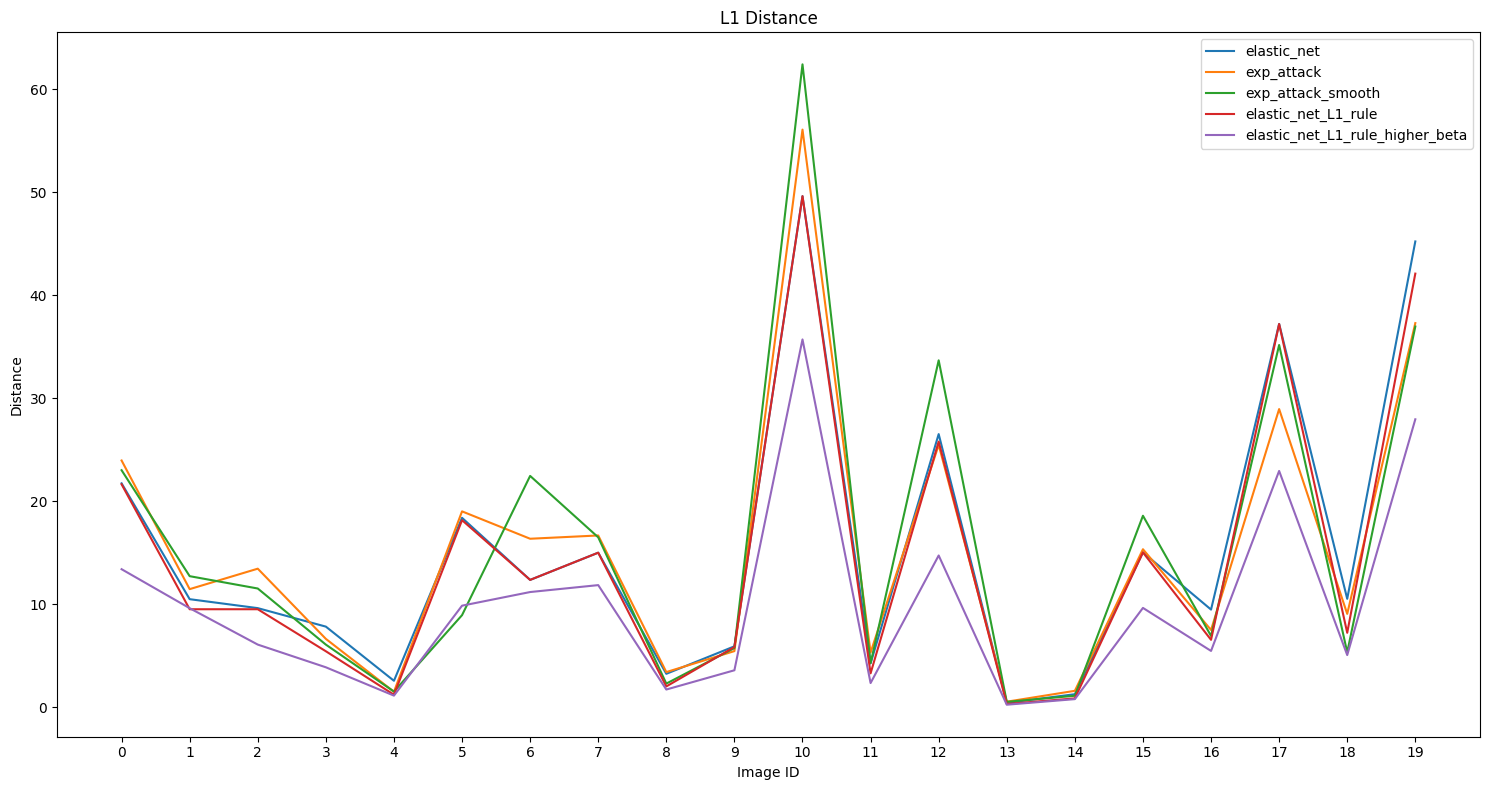

In [9]:
attack_types_with_distance = [
                'brendel_bethge', #bounded-min
                'pgd_early_stopping', #not-bounded
                'deep_fool', #not-bounded
                'carlini_wagner_l2', #not-bounded
                'elastic_net', #not-bounded
                'elastic_net_L1_rule', #not-bounded
                'elastic_net_L1_rule_higher_beta', #not-bounded
                'exp_attack', #not-bounded
                'exp_attack_smooth', #not-bounded
                ]

selected_attack_types_with_distance = [a for a in attack_types if a in attack_types_with_distance]

plt.figure(figsize=(15, 8))
for attack_type in selected_attack_types_with_distance:
  plt.plot(list(range(len(xtest))), results_dict[attack_type]['adversarial_distance'], label=attack_type)
plt.xlabel('Image ID')
plt.ylabel('Distance')
plt.title(f'L{norm} Distance')
plt.legend()
plt.tight_layout()
plt.xticks(list(range(len(xtest))))
plt.show()

# Runtime per image

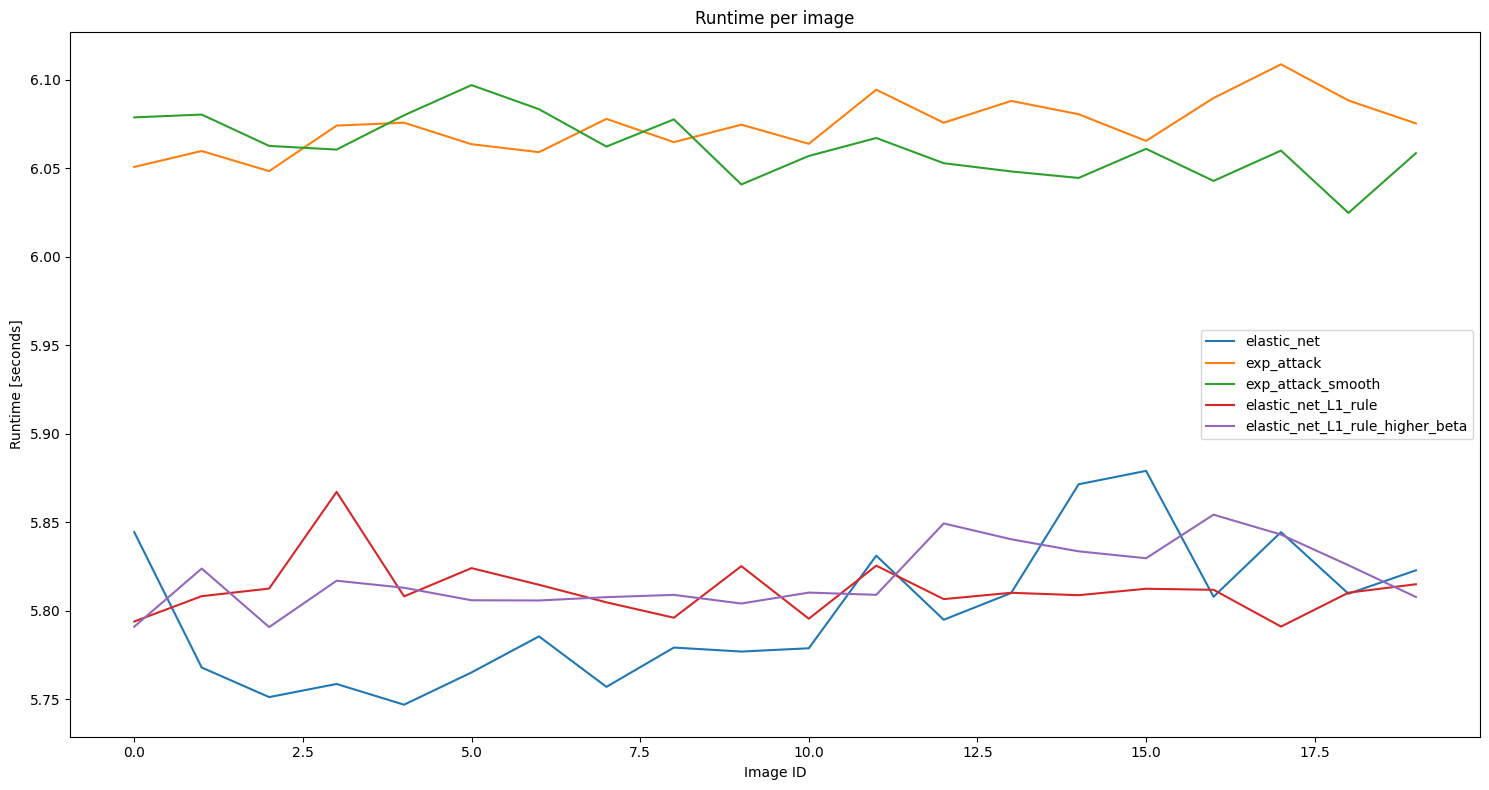

In [10]:
plt.figure(figsize=(15, 8))
for attack_type in attack_types:
  plt.plot(list(range(len(xtest))), results_dict[attack_type]['runtime'], label=attack_type)
plt.xlabel('Image ID')
plt.ylabel('Runtime [seconds]')
plt.title('Runtime per image')
plt.legend()
plt.tight_layout()
plt.show()

## Adversarial Accuracy

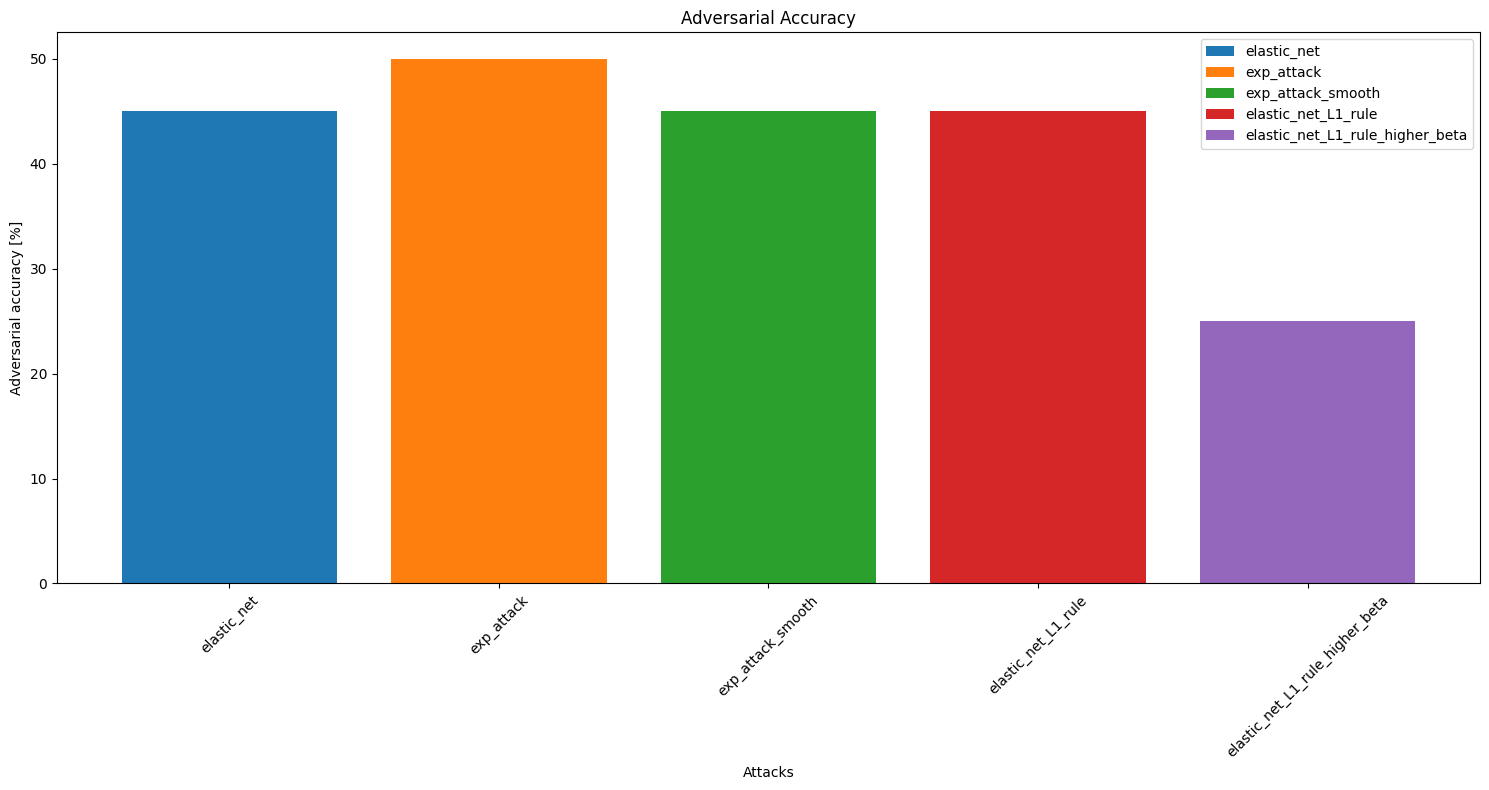

In [11]:
plt.figure(figsize=(15, 8))
for attack_type in attack_types:
  plt.bar(attack_type, results_dict[attack_type]['adversarial_accuracy'], label=attack_type)
plt.xlabel('Attacks')
plt.ylabel('Adversarial accuracy [%]')
plt.xticks(rotation=45)
plt.legend()
plt.title('Adversarial Accuracy')
plt.tight_layout()
plt.show()

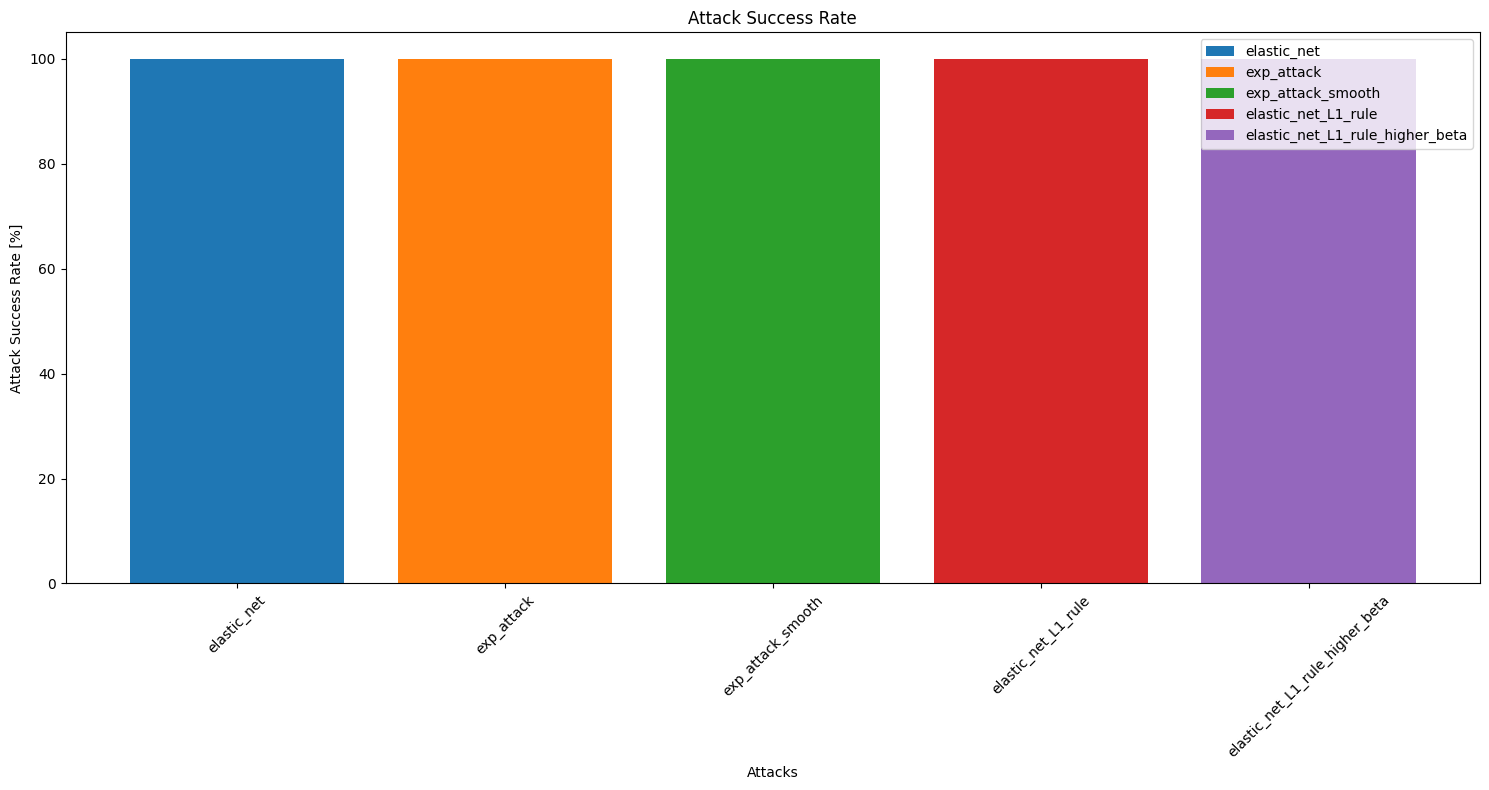

In [12]:
plt.figure(figsize=(15, 8))
for attack_type in attack_types:
  plt.bar(attack_type, results_dict[attack_type]['attack_success_rate'], label=attack_type)
plt.xlabel('Attacks')
plt.ylabel('Attack Success Rate [%]')
plt.xticks(rotation=45)
plt.legend()
plt.title('Attack Success Rate')
plt.tight_layout()
plt.show()

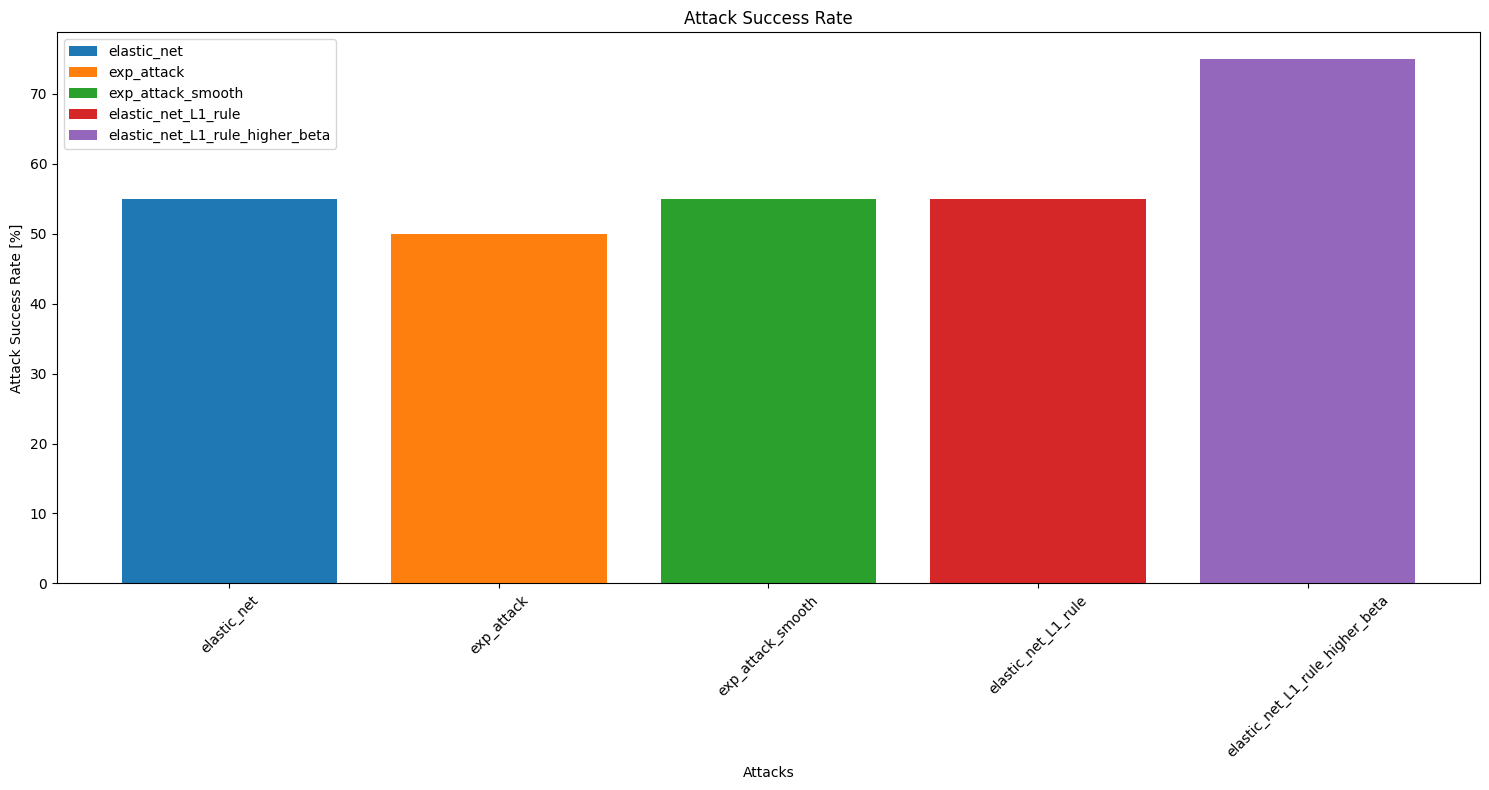

In [13]:
plt.figure(figsize=(15, 8))
for attack_type in attack_types:
  plt.bar(attack_type, results_dict[attack_type]['attack_success_rate_in_epsilon'], label=attack_type)
plt.xlabel('Attacks')
plt.ylabel('Attack Success Rate [%]')
plt.xticks(rotation=45)
plt.legend()
plt.title('Attack Success Rate')
plt.tight_layout()
plt.show()

## Total Runtime

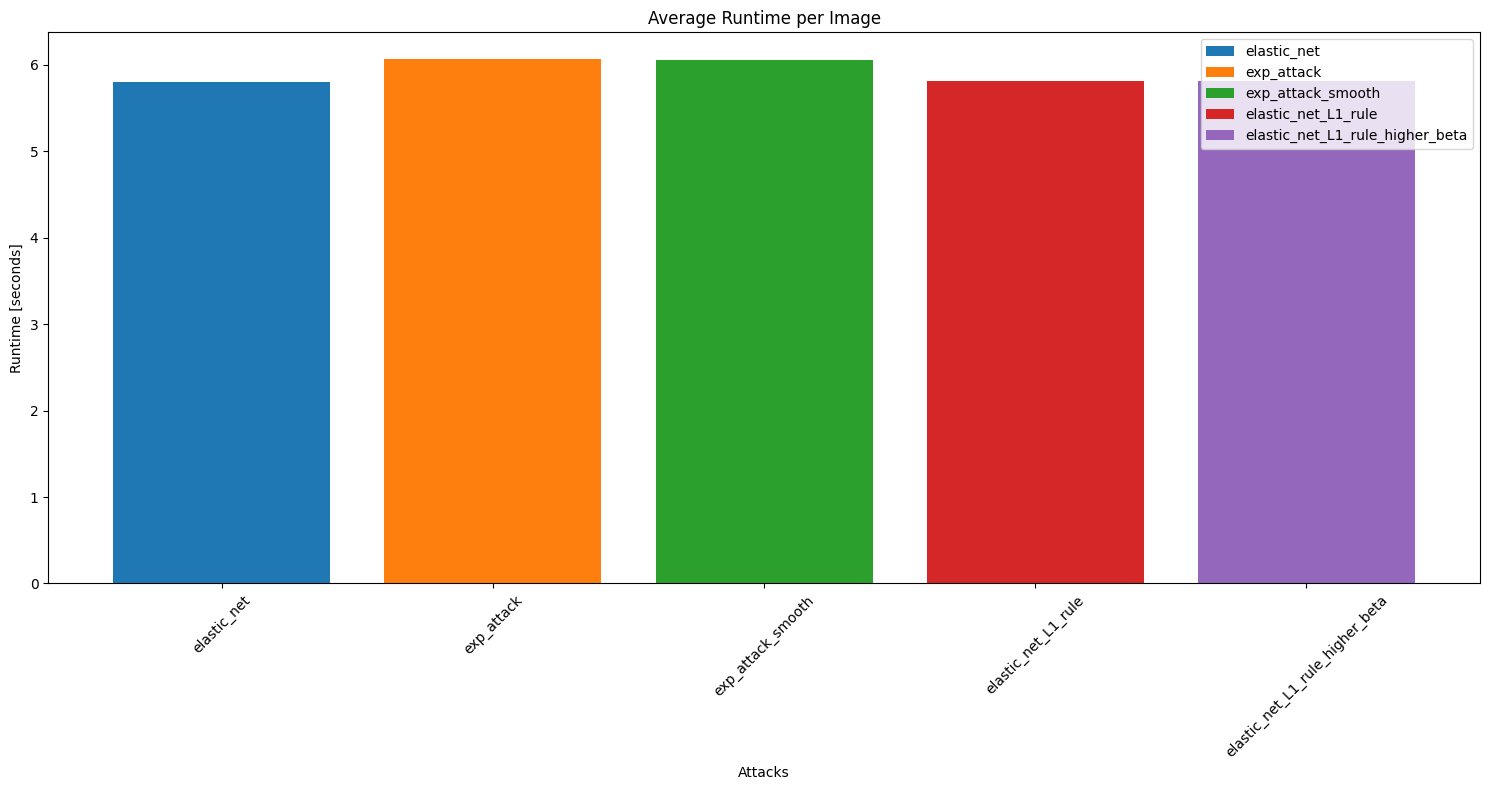

In [14]:
plt.figure(figsize=(15, 8))
for attack_type in attack_types:
  plt.bar(attack_type, sum(results_dict[attack_type]['runtime'])/splitsize, label=attack_type)
plt.xlabel('Attacks')
plt.xticks(rotation=45)
plt.ylabel('Runtime [seconds]')
plt.title('Average Runtime per Image')
plt.legend()
plt.tight_layout()
plt.show()